# 安徽安庆市项目`WRF-CMAQ`模拟分析
## 模拟结果分析：*`Process Analysis`*

---
*@author: Evan*\
*@date: 2023-06-12*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../src/')
from findpoint import findpoint
import ModelEvaLib as me
from namelist import *

In [2]:
shp_aq = Reader(shpmap)
shp_pro = Reader('F:/shapefile/shp_for_ArcGis/ChinaAdminDivisonSHP-master/2. Province/province.shp')
shp_cit = Reader('F:/shapefile/shp_for_ArcGis/ChinaAdminDivisonSHP-master/3. City/city.shp')

In [3]:
lon1, lat1 = 116.6, 31.1
lon2, lat2 = 117.4, 30.1

lon3, lat3 = 116.1, 29.74
lon4, lat4 = 117.46, 30.85

lon5, lat5 = 116.8, 30.64
lon6, lat6 = 117.3, 30.42

In [4]:
siteloc = pd.read_excel('F:/Data/Project_anqing/安庆市站点坐标.xlsx',header=0,index_col=0)

sites = ['安庆大学','市人大','环科院','马山宾馆','高新区']

lono = siteloc[siteloc.index.isin(sites)]['经度']
lato = siteloc[siteloc.index.isin(sites)]['纬度']

In [5]:
number = 50

lons1 = np.linspace(lon1,lon2,num=number)
lats1 = np.linspace(lat1,lat2,num=number)

lons2 = np.linspace(lon3,lon4,num=number)
lats2 = np.linspace(lat3,lat4,num=number)

lons3 = np.linspace(lon5,lon6,num=number)
lats3 = np.linspace(lat5,lat6,num=number)

## 确认各个剖面第几个点是市区

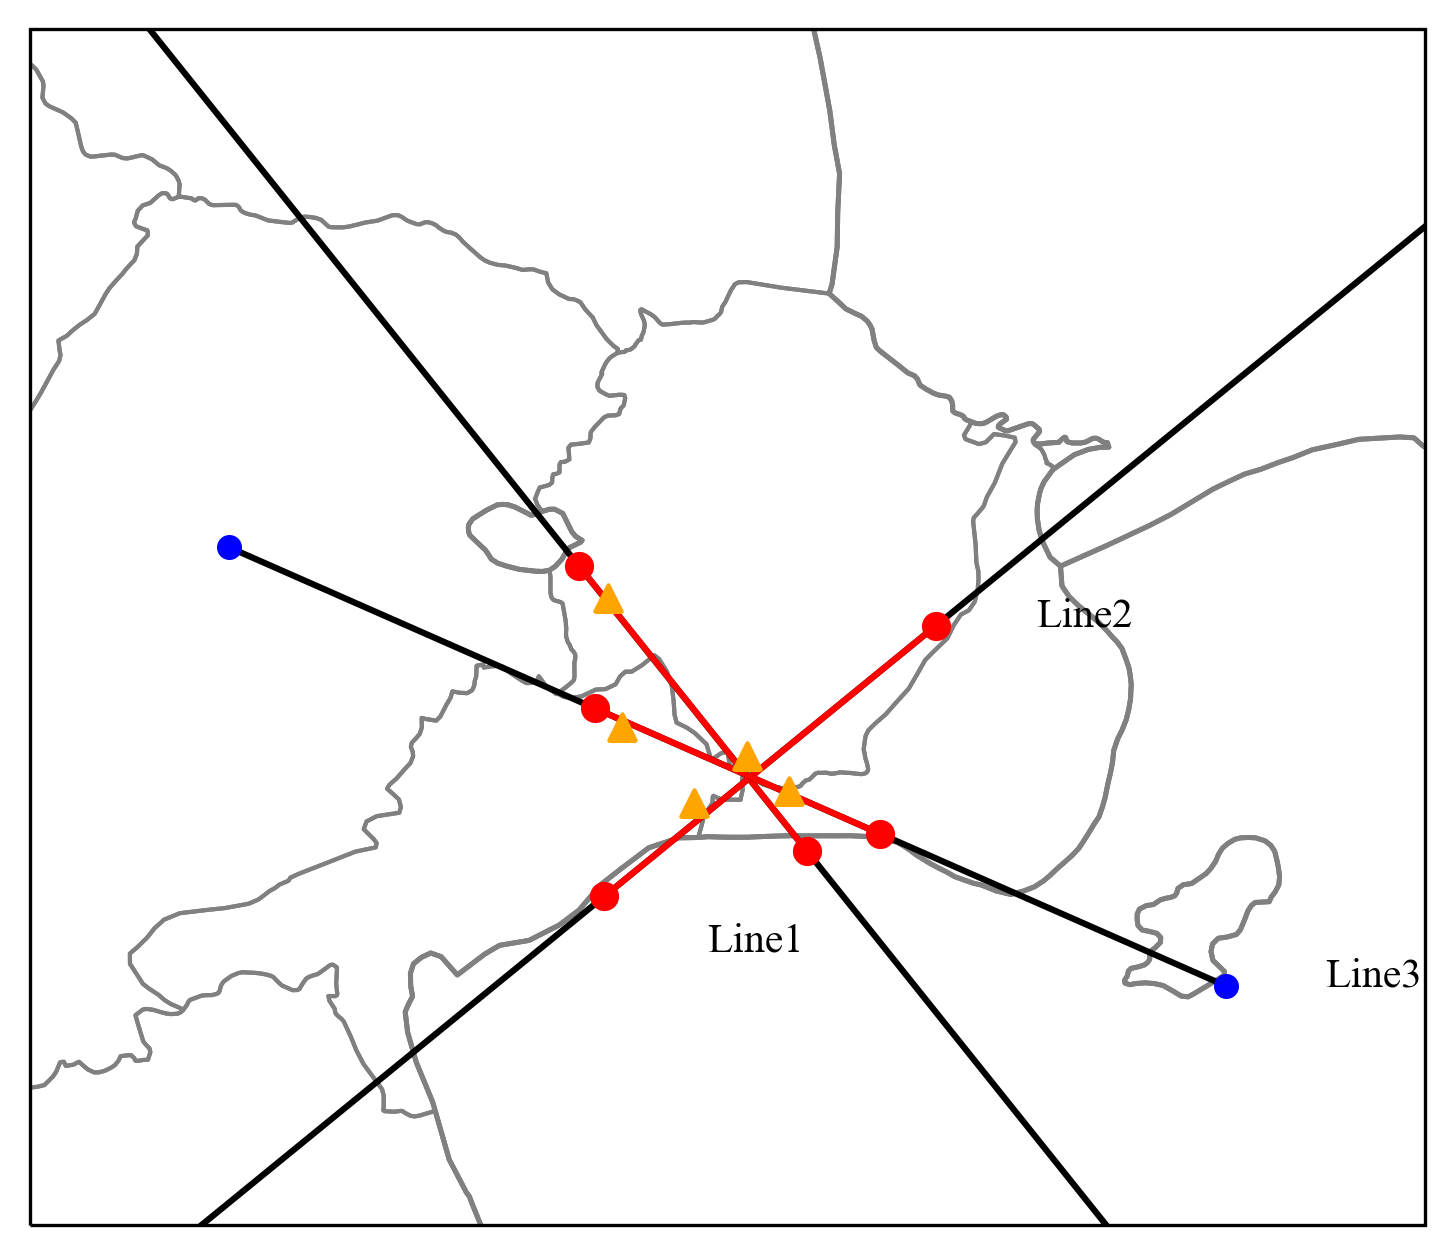

In [21]:
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(6,6),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})
ax.add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='gray',facecolor='None'), linewidth=1.8)
ax.add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='gray',facecolor='None'), linewidth=1.2)
ax.add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='gray',facecolor='None'), linewidth=1)
# gl=ax.gridlines(
#         xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
#         draw_labels=True, x_inline=False, y_inline=False,
#         linewidth=0, linestyle='--', color='gray')
# gl.top_labels = False
# gl.right_labels =False
# gl.rotate_labels=False

ax.set_extent([116.7, 117.4, 30.3, 30.9])

ax.plot([lon1, lon2], [lat1, lat2], 'k', transform=proj)
ax.plot(lon1, lat1, 'bo', markersize=5, transform=proj)
ax.plot(lon2, lat2, 'bo', markersize=5, transform=proj)
ax.text(lons1[30]-0.05,lats1[30]-0.05,'Line1',color='k',transform=proj)
ax.plot(lons1[23],lats1[23],'ro',markersize=6, transform=proj)
ax.plot(lons1[30],lats1[30],'ro',markersize=6, transform=proj)
ax.plot([lons1[23],lons1[30]],[lats1[23],lats1[30]],'r', transform=proj)

ax.plot([lon3, lon4], [lat3, lat4], 'k', transform=proj)
ax.plot(lon3, lat3, 'bo', markersize=5, transform=proj)
ax.plot(lon4, lat4, 'bo', markersize=5, transform=proj)
ax.text(lons2[38]+0.05,lats2[38],'Line2',color='k',transform=proj)
ax.plot(lons2[32],lats2[32],'ro',markersize=6, transform=proj)
ax.plot(lons2[38],lats2[38],'ro',markersize=6, transform=proj)
ax.plot([lons2[32],lons2[38]],[lats2[32],lats2[38]],'r', transform=proj)

ax.plot([lon5, lon6], [lat5, lat6], 'k', transform=proj)
ax.plot(lon5, lat5, 'bo', markersize=5, transform=proj)
ax.plot(lon6, lat6, 'bo', markersize=5, transform=proj)
ax.text(lon6+0.05,lat6,'Line3',color='k',transform=proj)
ax.plot(lons3[18],lats3[18],'ro',markersize=6, transform=proj)
ax.plot(lons3[32],lats3[32],'ro',markersize=6, transform=proj)
ax.plot([lons3[18],lons3[32]],[lats3[18],lats3[32]],'r', transform=proj)

ax.scatter(lono,lato,marker='^',s=40,color='orange',transform=proj,zorder=4)

plt.show()